## Final Project Submission

Please fill out:
* Student name: Michael Holthouser
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:



<img src="https://res.cloudinary.com/people-matters/image/upload/fl_immutable_cache,w_624,h_351,q_auto,f_auto/v1517845732/1517845731.jpg">

# Microsoft Movie Analysis
---

### Author: Michael Holthouser

## Overview 
---
I have been tasked with helping Microsoft in their new business venture into the movie industry. I think it is important to look at not only genres and release date, but also which actors and directors were voted the most popular.  After exploring the data, it seems that audiences really prefer movies of the action, adventure, science fiction genre, which makes sense with the recent surge of super hero movies. Although actors and directors are considered a soft data point and can't be described with a hard number, they are key to attracting the avid movie goers to come watch your film. I will also provide data and visualizations to show when the best time of year to release a film, profitable genres, and popular directors and actors. This analysis will ultimately provide the components that generate successful movies.

## Business Problem 
---

Microsoft has decided that it wants create a new movie studio, but they don't know where to begin. Having no prior experience in the movie business makes it very challenging indeed. To help Microsoft start off on the right foot, I will explore what movies have the highest worldwide gross since 2010 to get a good sense of what the public tends to like. I have investigated four aspects of box office movies to help assist Microsoft in making a good decision on what kind of movie to produce: 

- Release time: What time of the year promotes the highest worldwide gross?
- Directors: Which directors are the most popular in terms of number of votes? A good director is important to attract talented actors/actresses.
- Actors: Which actors should Microsoft target for their movie?
- Genres: What genre of movies do the best in the box office in terms of worldwide gross?

## The Data
---
Firstly, here are the necessary libraries needed for analysis and visualization of the data. 

In [2]:
import sqlite3
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

### Movie Budgets - The Numbers
---
The [The Numbers](https://www.the-numbers.com/movie/budgets/all) was launched by Bruce Nash on 1997 as a free resource for industry professionals, the investment community, and movie fans to track business information on movies. The site has grown to become the largest freely-available database of movie business information on the web. The Numbers now brings information on over 50,000 movies and nearly 200,000 people to the broadest audience possible.

In [3]:
df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


This will be a very important and heavily used dataframe as it contains the worldwide gross, our measuring stick of success to answer the questions regarding the best time of the year to release a film, and the top worldwide grossing movie genres. 

In [4]:
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### IMDb dataset
---
The Internet Movie Database ([IMDb](https://www.imdb.com/)) is an online database containing information and statistics about movies, TV shows and video games as well as actors, directors and other film industry professionals. Information on IMDb comes from a variety of sources, such as filmmakers, film studios, on-screen credits and other official sources. This database is accessed in this analysis using SQLite, so it had to be unzipped and then I performed queries to get my results. From this database, I will pull information about genres, actors, and directors. 

In [5]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

## Data Prep: When is the best time to release a film
---

I will first start by preparing and cleaning the data from the movie budgets dataframe. 

In [6]:
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


To the question of when the best time to release a movie, I will convert the release_date column to the datetime format, create a month column. 

In [7]:
df_movie_budgets['release_date'] = pd.to_datetime(df_movie_budgets['release_date'])
print(type(df_movie_budgets.release_date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
df_movie_budgets['release_month'] = pd.DatetimeIndex(df_movie_budgets['release_date'])
df_movie_budgets['release_month'] = df_movie_budgets['release_date'].dt.strftime('%B')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December


Since I am analyzing recent data from the year 2010, I am going to extract the year from the release_date column and create a new column called release_year.

In [9]:
df_movie_budgets['release_year'] = pd.DatetimeIndex(df_movie_budgets['release_date']).year
recent_movie_budgets = df_movie_budgets.query("release_year >= 2010")
recent_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",December,2015


In [10]:
recent_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2194 non-null   int64         
 1   release_date       2194 non-null   datetime64[ns]
 2   movie              2194 non-null   object        
 3   production_budget  2194 non-null   object        
 4   domestic_gross     2194 non-null   object        
 5   worldwide_gross    2194 non-null   object        
 6   release_month      2194 non-null   object        
 7   release_year       2194 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 154.3+ KB


Because mathmatical operations cannot be operated on strings, the columns production_budget, domestic_budget, and worldwide_budget must be formatted to the float data type as well as the "$" and "," removed. I obtained the code below with the assistance of a former student, Vincent Welsh.

In [11]:
recent_movie_budgets['production_budget'] = recent_movie_budgets['production_budget'].map(lambda x: float(x[1:].replace(',', '')))
recent_movie_budgets['domestic_gross'] = recent_movie_budgets['domestic_gross'].map(lambda x: float(x[1:].replace(',', '')))
recent_movie_budgets['worldwide_gross'] = recent_movie_budgets['worldwide_gross'].map(lambda x: float(x[1:].replace(',', '')))

In [12]:
recent_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,June,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,December,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,December,2015


Next, I will total worldwide_gross and group by the month to see since 2010, which month has the highest worldwide gross. 

In [13]:
top_gross_month = recent_movie_budgets.groupby(recent_movie_budgets['release_month'])\
                  ['worldwide_gross'].median().sort_values(ascending=False)
top_gross_month

release_month
November    60217171.00
July        57273049.00
February    43299774.50
May         43061376.00
August      40650842.00
January     36285960.50
June        29867459.50
September   22281732.00
March       20592763.00
April       17478366.50
October     12429202.00
December    10103233.00
Name: worldwide_gross, dtype: float64

Next, I will use a barplot to visualize the data obtained to get a better look of what months have the highest worldwide gross. The customization code in order to rotate the x-axis was obtained on [Youtube](https://www.youtube.com/watch?v=cLNOADl17b4)

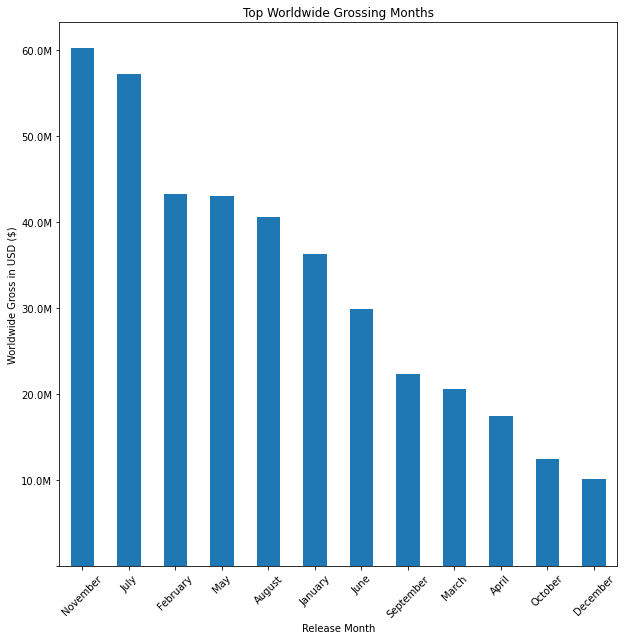

In [14]:
ax=top_gross_month.plot.bar(x='release_month', y='worldwide_gross', figsize=(10,10))

ax.set(ylabel = 'Worldwide Gross in USD ($)', xlabel = 'Release Month')
ax.set_title('Top Worldwide Grossing Months')

##rotate x-axis to a 45 degree angle 
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

def format_num(data_value,indx):
    """
    This function formats graphs by adding B to billions, M to milliions,
    and K to thousands. The formatting code was provided by former studen Vincent Welsh. 
    """

    if data_value >= 1_000_000_000:
        formatter = '{:1.2f}B'.format(data_value*.000000001)
        return formatter
    elif data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
        return formatter
    elif data_value >= 1_000:
        formatter = '{:1.0f}K'.format(data_value*.001)
        return formatter
    else:
        formatter=None

ax.yaxis.set_major_formatter(format_num)

It appears that the top worldwide grossing month to release a film since 2010 is in the month of November, with July as close second. My intial thoughts before I began the analysis, was that the best month to release a film was going to be around Christmas time. But after more analysis, it appears that the month of December is actually the worst time to release a film. 

### Data Prep: Which directors are the most popular in terms of number of votes
---

This data was contained in a SQLite database obtained from the [IMDb](https://www.imdb.com/) website. I used number of votes as the measurement for popularity because average rating was not an accurate measuring stick. In my original findings, some directors could have a 10 average rating, but not have any votes, meaning they have not filmed many movies. The more votes a director had gotten means their movies have gotten more worldwide exposure and attention. 
I filtered for number of votes to be higher than 100,000 to limit the scope of the data, and to only provide the most popular directors for analysis. 

This is a query to create a pandas table dataframe called directors. 

In [15]:
directors = pd.read_sql("""
SELECT primary_title AS title, genres, primary_name AS name, category, averagerating AS average_rating, numvotes AS number_of_votes
FROM movie_ratings
JOIN movie_basics
    USING(movie_id)
JOIN principals
    USING(movie_id)
JOIN directors
    USING(movie_id)
JOIN persons
    USING(person_id)
WHERE category like 'director'
and start_year >= 2010
and number_of_votes >100000
GROUP BY title, name
ORDER BY numvotes DESC;

""", conn)

In [16]:
directors.head()

,title,genres,name,category,average_rating,number_of_votes
0,Inception,"Action,Adventure,Sci-Fi",Christopher Nolan,director,8.80,1841066
1,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,director,8.40,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,director,8.60,1299334
3,Django Unchained,"Drama,Western",Quentin Tarantino,director,8.40,1211405
4,The Avengers,"Action,Adventure,Sci-Fi",Joss Whedon,director,8.10,1183655


Next I am grouping the dataframe by the director name, and ordering the number_of_votes in descending order.  Then I created a new dataframe called top_fifteen_dir to give me a list of just top 15 directors in terms of number of votes. 

In [17]:
dir_nm = directors.groupby(directors['name'])\
                  ['number_of_votes'].median().sort_values(ascending=False).reset_index()
dir_nm.head(15)

,name,number_of_votes
0,Christopher Nolan,1343551.50
1,Martin Scorsese,1005960.00
2,Joss Whedon,924624.50
3,Quentin Tarantino,823185.50
4,Tim Miller,820847.00
5,George Miller,780910.00
6,James Gunn,715655.50
7,Éric Toledano,677343.00
8,Olivier Nakache,677343.00
9,Joe Johnston,668137.00


In [18]:
top_fifteen_dir = dir_nm.head(15)

Next, since we are getting one value, the median, a bar plot will be the best option to visualize my findings. 

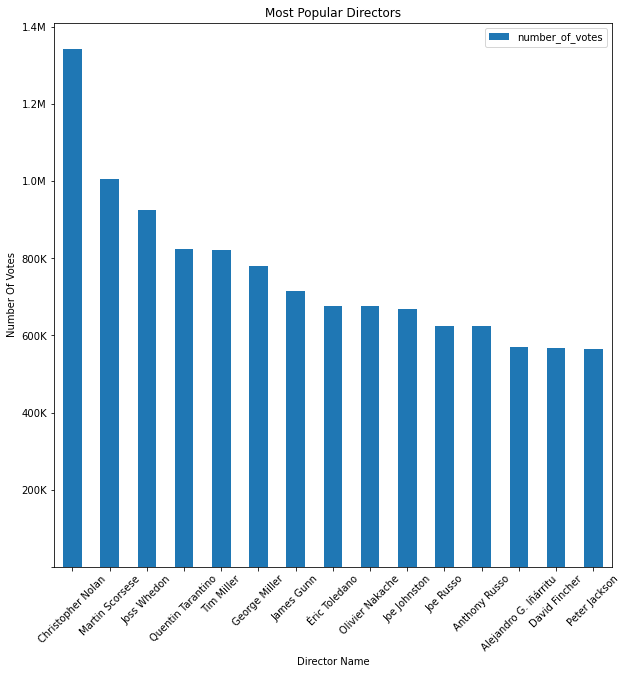

In [19]:
ax1=top_fifteen_dir.plot.bar(x='name', y='number_of_votes', figsize=(10,10))

ax1.set(ylabel = 'Number Of Votes', xlabel = 'Director Name')
ax1.set_title('Most Popular Directors')

##rotate x-axis to a 45 degree angle 
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.yaxis.set_major_formatter(format_num)

After visualizing my findings, it seems that Christopher Nolan is the most popular director voted by the public audience with Martin Scorsese and Joss Whedon coming in as the second and third most voted directors. 

### Data Prep: Which actors are the most popular in terms of number of votes
---

Next we will look at which actors to consider when hiring for your new movie production company. Since I am interested in the same column data as the director dataframe, I will use the same query on the IMDb database. Except this time filtering for actor names and not director names. 

In [20]:
actors = pd.read_sql("""
SELECT primary_title AS title, primary_name AS name, category, numvotes AS number_of_votes
FROM movie_ratings
JOIN movie_basics
    USING(movie_id)
JOIN principals
    USING(movie_id)
JOIN persons
    USING(person_id)
WHERE category like 'actor'
and start_year >= 2010
and number_of_votes >100000
GROUP BY title, name
ORDER BY numvotes DESC;

""", conn)

In the query, we filtered for actors in films from the year 2010 and later, and that have gotten more than one million votes to get a list of the most popular actors. 

Next I am grouping the dataframe by the actor name, and ordering the number_of_votes in descending order.  Then I created a new dataframe called top_fifteen_act to give me a list of just top 15 directors in terms of number of votes. 

In [21]:
act_nm = actors.groupby(actors['name'])\
                  ['number_of_votes'].median().sort_values(ascending=False).reset_index()
act_nm.head(15)

,name,number_of_votes
0,Ken Watanabe,1095876.50
1,Leonardo DiCaprio,1005960.00
2,Ed Skrein,820847.00
3,Neil Patrick Harris,761592.00
4,Tyler Perry,761592.00
5,Orto Ignatiussen,710018.00
6,Michael Gambon,691835.00
7,Ned Beatty,682218.00
8,Tim Allen,682218.00
9,Omar Sy,677343.00


In [22]:
top_fifteen_act = act_nm.head(15)

Next, since we are getting one value, the median, a bar plot will be the best option to visualize my findings. 

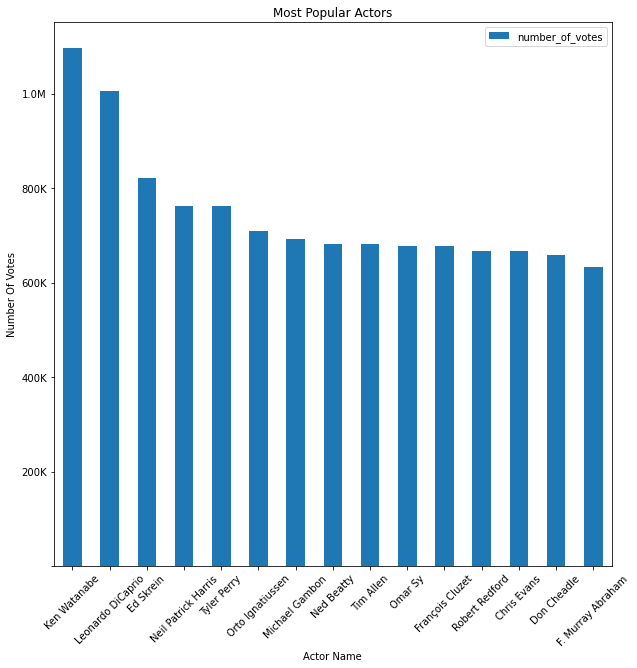

In [23]:
ax2=top_fifteen_act.plot.bar(x='name', y='number_of_votes', figsize=(10,10))

ax2.set(ylabel = 'Number Of Votes', xlabel = 'Actor Name')
ax2.set_title('Most Popular Actors')

##rotate x-axis to a 45 degree angle 
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax2.yaxis.set_major_formatter(format_num)

From the bar plot, it appears that Ken Watanabe is the most popular actor with Leonardo DiCaprio as a close second. 

### Data Prep: What genres did the best in the box office in terms of worldwide gross
---

In the cells below, we are creating a query to find movies from 2010 and later with their associated genres. With those queries, a dataframe will be created to be able to loop it with the recent_movie_budgets dataframe to be able to add the genres to it's associated movie title. 
The first query is making a list of unique movie titles from the database populated by the SQL query. 

In [24]:
genres = list(pd.read_sql("""
SELECT primary_title AS title, genres AS genre, start_year AS release_year
FROM movie_basics
WHERE start_year >= 2010;
""", conn).title.unique())

In [25]:
df_genres = pd.read_sql("""
SELECT primary_title AS title, genres AS genre, start_year AS release_year
FROM movie_basics
WHERE start_year >= 2010;
""", conn)

In this cell we are creating a counter to sum up how many movies in the recent_movie_budgets dataframe I could add a genre too. In other words, we want to make sure the list of movies from the SQL database exist in the CSV database. 

In [26]:
count = 0
for genre in genres:
    if genre in list(recent_movie_budgets.movie.unique()):
        count += 1


There will a total of 1,798 movie in the recent_movie_budgets list that could have a corresponding genre. That leaves about 400 total movie titles, that will have a genre of "no category" in the dataframe

In [27]:
count

1798

In [28]:
len(recent_movie_budgets.movie.unique())

2190

This cell shows that for the movies in the recent_movie_budgets dataframe, the movie titles that will not have a genre associated with them will have instead a string that says 'no category'. 

In [29]:
genre_list = []
##Loop through titles to match with genres dataframe
for title in list(recent_movie_budgets.movie):
    ##This is where we will check if the title is in the genres dataframe
    if title in genres:
        genre_list.append(df_genres.loc[df_genres.title == title].genre)
    else:
        genre_list.append('no category')

This cell resets the index, so the output is formatted to only show the movie genres.  

In [30]:
genre_list = [x if type(x) == str else x.reset_index(drop=True)[0] for x in genre_list]

In [31]:
genre_list

['Action,Adventure,Fantasy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'no category',
 'no category',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Thriller',
 'Action,Thriller',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Western',
 'Action,Adventure,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Adventure,Family,Fantasy',
 'Adventure,Fantasy',
 'Adventure,Fantasy',
 'Action,Crime,Thriller',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Comedy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Drama',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Animation',
 'Action,Adventure,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Sci-Fi',
 'no category',
 'Adventure,Family,Fantasy',
 

Next, a new column called 'genre' is created where we will fill in the associated movie titles genres that were obtained from the SQL query. 

In [32]:
recent_movie_budgets['genre'] = genre_list
recent_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,genre
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,June,2019,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,May,2015,"Action,Adventure,Sci-Fi"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,December,2017,no category
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,December,2015,no category


This line of code was just out of curiosity, to see how many movie genres we had in our list. 

In [33]:
recent_movie_budgets['genre'].nunique()

261

This is where the final dataframe is being created. I have filtered the woldwide_gross to be at least one billion dollars, and to exclude any movie titles that had 'no category' in the genre field. 

In [34]:
recent_movie_budgets = recent_movie_budgets.loc[(recent_movie_budgets['genre']!='no category') & \
                                               (recent_movie_budgets['worldwide_gross'] >= 15000000)]
recent_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,genre
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,June,2019,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,May,2015,"Action,Adventure,Sci-Fi"
6,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,April,2018,"Action,Adventure,Sci-Fi"
8,9,2017-11-17,Justice League,300000000.00,229024295.00,655945209.00,November,2017,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...
5217,18,2012-05-25,Chernobyl Diaries,1000000.00,18119640.00,42411721.00,May,2012,"Horror,Mystery,Thriller"
5224,25,2010-12-29,Blue Valentine,1000000.00,9737892.00,16566240.00,December,2010,"Drama,Romance"
5228,29,2018-07-20,Unfriended: Dark Web,1000000.00,8866745.00,16434588.00,July,2018,"Crime,Horror,Mystery"
5337,38,2013-07-12,Fruitvale Station,900000.00,16098998.00,17549645.00,July,2013,"Biography,Drama,Romance"


To continue with the data clean up, I will prepare the genre column for the explode function to separate the genres. So instead of see a genre called, "Action, Adventure, Fantasy", it will now read as three separate genres. 

In [35]:
recent_movie_budgets['genre'] = recent_movie_budgets['genre'].str.split(",")
recent_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,genre
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011,"[Action, Adventure, Fantasy]"
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,June,2019,"[Action, Adventure, Sci-Fi]"
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,May,2015,"[Action, Adventure, Sci-Fi]"
6,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,April,2018,"[Action, Adventure, Sci-Fi]"
8,9,2017-11-17,Justice League,300000000.00,229024295.00,655945209.00,November,2017,"[Action, Adventure, Fantasy]"
...,...,...,...,...,...,...,...,...,...
5217,18,2012-05-25,Chernobyl Diaries,1000000.00,18119640.00,42411721.00,May,2012,"[Horror, Mystery, Thriller]"
5224,25,2010-12-29,Blue Valentine,1000000.00,9737892.00,16566240.00,December,2010,"[Drama, Romance]"
5228,29,2018-07-20,Unfriended: Dark Web,1000000.00,8866745.00,16434588.00,July,2018,"[Crime, Horror, Mystery]"
5337,38,2013-07-12,Fruitvale Station,900000.00,16098998.00,17549645.00,July,2013,"[Biography, Drama, Romance]"


After performing the string split method to split the genres at the comma, next I will initiate the explode method to separate the three genres. 

In [36]:
rec_mb = recent_movie_budgets.explode('genre')
rec_mb

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,genre
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011,Action
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011,Adventure
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011,Fantasy
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,June,2019,Action
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,June,2019,Adventure
...,...,...,...,...,...,...,...,...,...
5337,38,2013-07-12,Fruitvale Station,900000.00,16098998.00,17549645.00,July,2013,Drama
5337,38,2013-07-12,Fruitvale Station,900000.00,16098998.00,17549645.00,July,2013,Romance
5679,80,2015-07-10,The Gallows,100000.00,22764410.00,41656474.00,July,2015,Horror
5679,80,2015-07-10,The Gallows,100000.00,22764410.00,41656474.00,July,2015,Mystery


In the cell below I performed the groupby method on the genre column, and sorted the worldwide gross median value in descending order. Interesting enough, animation actually had the highest worldwide gross median value. 

In [37]:
top_genre = rec_mb.groupby(rec_mb['genre'])\
                  ['worldwide_gross'].median().sort_values(ascending=False).reset_index()
top_genre.head(20)

,genre,worldwide_gross
0,Animation,316450194.50
1,Sci-Fi,296584910.00
2,Adventure,273477501.00
3,Western,256139521.50
4,Action,167849187.00
5,Family,136615753.50
6,Fantasy,132110397.00
7,Comedy,95572749.00
8,Musical,90552675.00
9,Thriller,86648359.00


To get a better grasp of the data, I created a visualization showing the top worldwide grossing movie genres since 2010. 

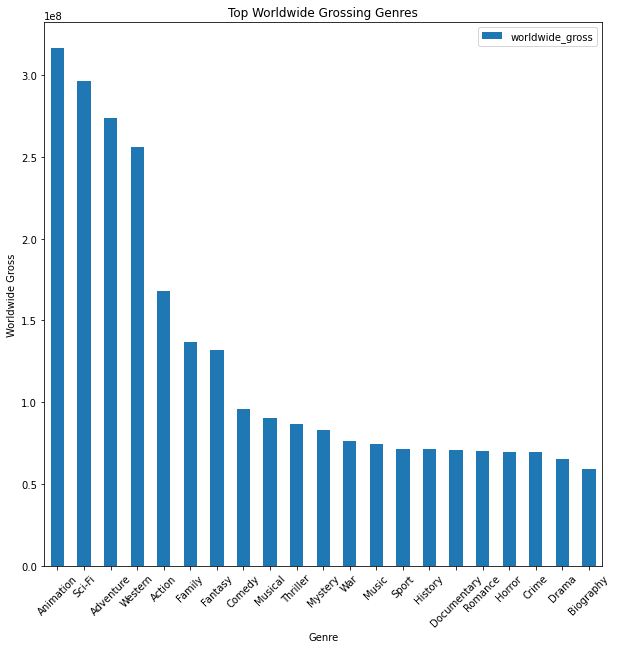

In [40]:
ax3=top_genre.plot.bar(x='genre', y='worldwide_gross', figsize=(10,10))

ax3.set(ylabel = 'Worldwide Gross', xlabel = 'Genre')
ax3.set_title('Top Worldwide Grossing Genres')

##rotate x-axis to a 45 degree angle 
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax2.yaxis.set_major_formatter(format_num)

Since, 2010 it appears that animation, sci-fi, adventure, and westerns have the highest median worldwide gross. 

## Conclusion
---
In conclusion, I would recommend that Microsoft create films of the animation, sci-fi, adventure, and western genres. From the data provided, hiring well known directors and actors is proven to positively impact the viewing of a film by the public audience. To promote the highest box office sales, I recommend a release date during the summer season or during the Thanksgiving holdliday in November. 
The movie genre, the hiring of a director and lead actor, and release month are all factors critical to creating a successul film. 